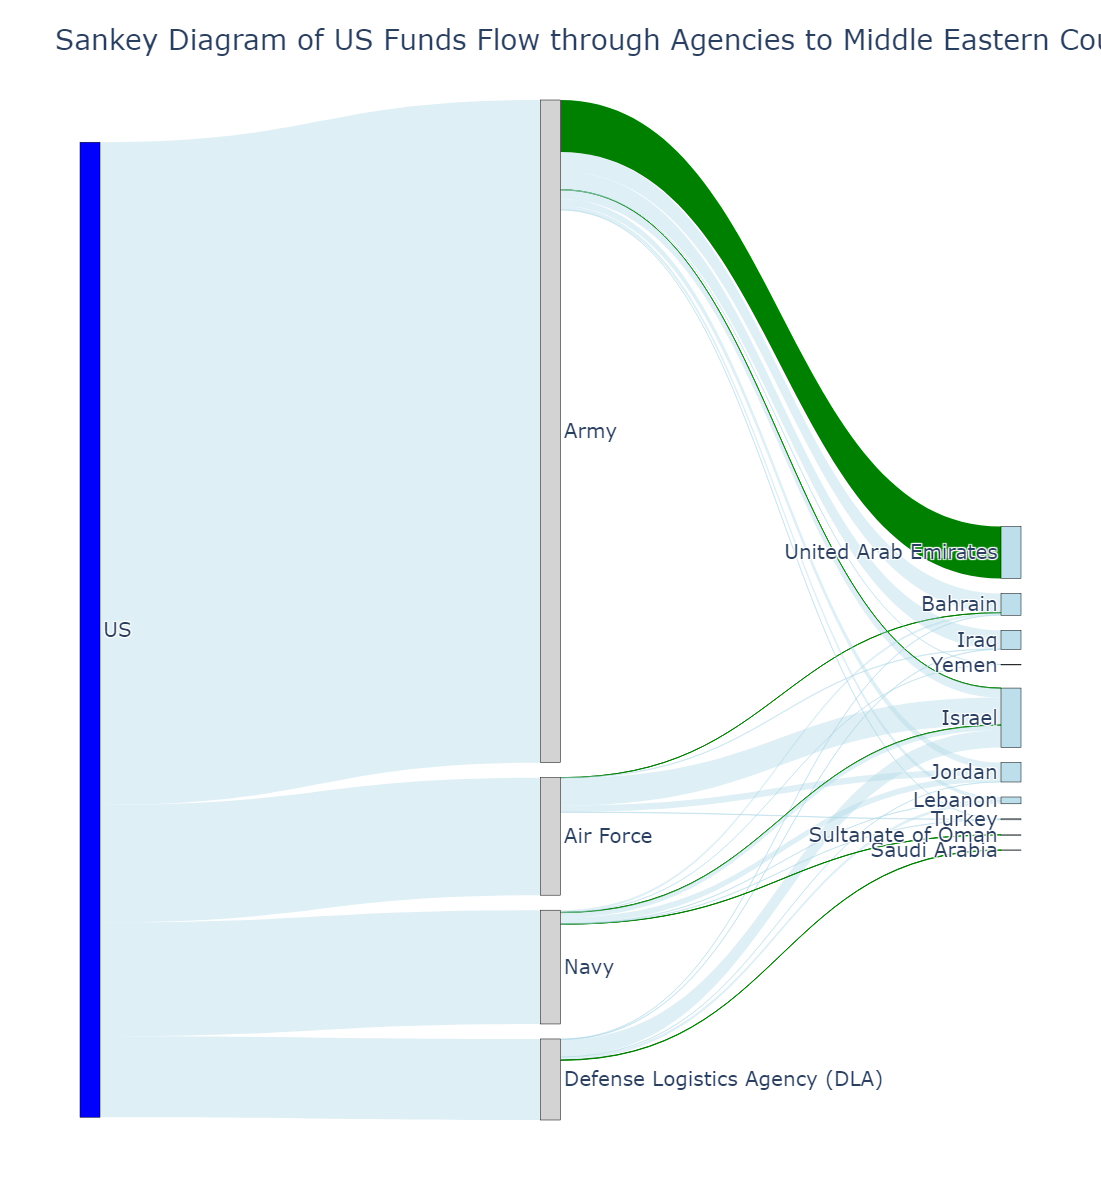

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [8]:
!pip install plotly
!pip install openpyxl
!pip install -U kaleido
import kaleido


import pandas as pd
import plotly.graph_objects as go

# Load the Excel file
file_path = "C:/Users/mugdh/OneDrive/Desktop/mism 6210/final term/EDA_Public_Report_2020-06-15.xlsx"

data = pd.read_excel(file_path, sheet_name='EDA')

# Filter data for only Middle Eastern countries
data = data[data['Region(Transfer to)'] == 'Middle East']

# For the flow from US to Agency, use 'Acquisition Cost'
us_to_agency = data.groupby(['Implementing Agency'])['Total Acquisition Value'].sum().reset_index()

# For the flow from Agency to Middle Eastern Countries, use 'Total Current Value'
agency_to_country = data.groupby(['Implementing Agency', 'Country (Transfer to)', 'Transfer Authority'])['Total Current Value'].sum().reset_index()

# Nodes setup
agencies = us_to_agency['Implementing Agency'].unique()
countries = agency_to_country['Country (Transfer to)'].unique()

nodes_labels = ['US'] + list(agencies) + list(countries)
node_colors = ['blue'] + ['lightgrey'] * len(agencies) + ['rgba(173, 216, 230, 0.8)'] * len(countries)

# Indexing nodes
agency_idx = {agency: i+1 for i, agency in enumerate(agencies)}
country_idx = {country: i+1+len(agencies) for i, country in enumerate(countries)}

# Source, Target nodes, and Values setup for links from US to agencies
us_source = [0] * len(us_to_agency)
agency_target = [agency_idx[agency] for agency in us_to_agency['Implementing Agency']]
us_to_agency_values = us_to_agency['Total Acquisition Value'].tolist()

# Source, Target nodes, and Values setup for links from agencies to Middle Eastern countries
agency_source = []
country_target = []
agency_to_country_values = []
link_colors = []

for _, row in agency_to_country.iterrows():
    agency_source.append(agency_idx[row['Implementing Agency']])
    country_target.append(country_idx[row['Country (Transfer to)']])
    agency_to_country_values.append(row['Total Current Value'])
    if row['Transfer Authority'] == 'Grant Authority':
        link_colors.append('rgba(173, 216, 230, 0.4)')  # Color for grants
    else:
        link_colors.append('green')  # Color for FMS Sales

# Combine sources, targets, and values for the Sankey diagram
source_nodes = us_source + agency_source
target_nodes = agency_target + country_target
values = us_to_agency_values + agency_to_country_values

us_to_agency_link_colors = ['rgba(173, 216, 230, 0.4)'] * len(us_source)
link_colors = us_to_agency_link_colors + link_colors

# Create the Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=nodes_labels,
        color=node_colors
    ),
    link=dict(
        source=source_nodes,
        target=target_nodes,
        value=values,
        color=link_colors
    ))])

# Updating the layout for the diagram
fig.update_layout(title_text="Sankey Diagram of US Funds Flow through Agencies to Middle Eastern Countries", font_size=20, height=1200, width=2400)

# Display the diagram
fig.show()

fig.write_image("C:/Users/mugdh/OneDrive/Desktop/2013Final_Sankey_Diagram_2013_2016.png")

# Save the figure as an HTML file
html_path = 'C:/Users/mugdh/OneDrive/Desktop/2013Final_Sankey_Diagram_2013_2016.html'
fig.write_html(html_path)
